In [1]:
import pandas as pd
import numpy as np
import random
import warnings
from utils import *
from datasets import *
from models import *

warnings.filterwarnings("ignore", category=pd.errors.PerformanceWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Set display options
pd.set_option("display.max_rows", 500)  # Replace 500 with your desired number of rows
pd.set_option(
    "display.max_columns", 10
)  # Replace 10 with your desired number of columns
pd.set_option("display.width", 1000)  # Adjust the width as needed
pd.set_option("display.max_colwidth", 50)  # Adjust the column width as needed

### Data Preparation

In [2]:
# Prepare the data
# Adjust your path here
quality_df_dir = './results/quality_scores_per_subject.csv'
features_dir = "dataset_sample/features_df/"
info_dir = "dataset_sample/participant_info.csv"
clean_df, new_features, good_quality_sids = data_preparation(
    threshold = 0.2, 
    quality_df_dir = quality_df_dir,
    features_dir = features_dir,
    info_dir = info_dir)
print(clean_df.shape)
print(len(new_features))

(82671, 610)
597


### Split data to train, val, and test

In [3]:
SW_df, final_features = split_data(clean_df, good_quality_sids, new_features)
SW_df

,PPG_Rate_Mean,HRV_SDNN,HRV_MadNN,HRV_SDRMSSD,HRV_Prc20NN,...,Hypopnea,Multiple_Events,artifact,sid,BMI
1,87.451445,267.856258,277.987500,0.762788,468.750,...,0.0,0.0,0,S003,51.0
2,84.687304,280.299933,231.656250,0.672688,515.625,...,0.0,0.0,1,S003,51.0
3,90.889185,224.392912,208.490625,0.730625,465.625,...,0.0,0.0,1,S003,51.0
4,79.140186,303.274460,324.318750,0.769270,468.750,...,0.0,0.0,1,S003,51.0
5,90.383327,297.089740,289.570312,0.767894,450.000,...,0.0,0.0,1,S003,51.0
...,...,...,...,...,...,...,...,...,...,...,...
85066,61.392727,132.432765,23.165625,0.856175,1000.000,...,0.0,0.0,0,S102,26.0
85067,61.198295,138.500822,46.331250,1.081764,978.125,...,0.0,0.0,0,S102,26.0
85068,57.181574,18.233936,23.165625,0.781327,1031.250,...,0.0,0.0,0,S102,26.0
85069,57.535505,17.652470,23.165625,0.934502,1031.250,...,0.0,0.0,0,S102,26.0


In [4]:
import random
random.seed(0)
train_sids = random.sample(good_quality_sids, 56)
remaining_sids = [subj for subj in good_quality_sids if subj not in train_sids]
val_sids = random.sample(remaining_sids, 8)
test_sids = [subj for subj in remaining_sids if subj not in val_sids]

group_variables = ['AHI_Severity', 'Obesity']
# when idx == 0, it returns ['AHI_Severity'], the first variable in the list
# when idx == 1, it returns ['Obesity'], the second variable in the list
group_variable = get_variable(group_variables, idx = 0) # set your variable

In [5]:
X_train, y_train, group_train = train_test_split(SW_df, train_sids, final_features, group_variable)
print("Train data balance: ")
print(np.unique(y_train, return_counts=True))
print('')

X_val, y_val, group_val = train_test_split(SW_df, val_sids, final_features, group_variable)
print("Validation data balancpredicted_probabilitiese: ")
print(np.unique(y_val, return_counts=True))
print('')

X_test, y_test, group_test = train_test_split(SW_df, test_sids, final_features, group_variable)
print("Test data balance: ")
print(np.unique(y_test, return_counts=True))
print(y_train.sum())

Train data balance: 
(array([0., 1.]), array([33063, 24620]))

Validation data balancpredicted_probabilitiese: 
(array([0., 1.]), array([5001, 3038]))

Test data balance: 
(array([0., 1.]), array([10402,  6547]))
24620.0


### Resample data

In [6]:
X_train_resampled, y_train_resampled, group_train_resampled = resample_data(X_train, y_train, group_train, group_variable)

### LightGBM

In [7]:
final_lgb_model = LightGBM_engine(X_train_resampled, y_train_resampled, X_val, y_val)

  2%|▏         | 1/50 [00:02<02:22,  2.92s/trial, best loss: -0.6892165365712634]

/Users/mattmacrides/miniconda3/envs/dreamt/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



  4%|▍         | 2/50 [00:08<03:37,  4.52s/trial, best loss: -0.6892165365712634]

/Users/mattmacrides/miniconda3/envs/dreamt/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



  6%|▌         | 3/50 [00:11<03:01,  3.87s/trial, best loss: -0.6892165365712634]

/Users/mattmacrides/miniconda3/envs/dreamt/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



  8%|▊         | 4/50 [00:13<02:25,  3.16s/trial, best loss: -0.6892165365712634]

/Users/mattmacrides/miniconda3/envs/dreamt/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 10%|█         | 5/50 [00:14<01:50,  2.45s/trial, best loss: -0.6892165365712634]

/Users/mattmacrides/miniconda3/envs/dreamt/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 12%|█▏        | 6/50 [00:16<01:38,  2.25s/trial, best loss: -0.6892165365712634]

/Users/mattmacrides/miniconda3/envs/dreamt/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 14%|█▍        | 7/50 [00:18<01:23,  1.93s/trial, best loss: -0.6892165365712634]

/Users/mattmacrides/miniconda3/envs/dreamt/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 16%|█▌        | 8/50 [00:20<01:22,  1.97s/trial, best loss: -0.6892165365712634]

/Users/mattmacrides/miniconda3/envs/dreamt/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 18%|█▊        | 9/50 [00:21<01:19,  1.93s/trial, best loss: -0.6892165365712634]

/Users/mattmacrides/miniconda3/envs/dreamt/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 20%|██        | 10/50 [00:23<01:16,  1.90s/trial, best loss: -0.6892165365712634]

/Users/mattmacrides/miniconda3/envs/dreamt/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 22%|██▏       | 11/50 [00:25<01:14,  1.92s/trial, best loss: -0.6892165365712634]

/Users/mattmacrides/miniconda3/envs/dreamt/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 24%|██▍       | 12/50 [00:27<01:09,  1.82s/trial, best loss: -0.6892165365712634]

/Users/mattmacrides/miniconda3/envs/dreamt/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 26%|██▌       | 13/50 [00:30<01:18,  2.12s/trial, best loss: -0.6892165365712634]

/Users/mattmacrides/miniconda3/envs/dreamt/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 28%|██▊       | 14/50 [00:32<01:20,  2.22s/trial, best loss: -0.6892165365712634]

/Users/mattmacrides/miniconda3/envs/dreamt/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 30%|███       | 15/50 [00:36<01:32,  2.64s/trial, best loss: -0.6955862278173821]

/Users/mattmacrides/miniconda3/envs/dreamt/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 32%|███▏      | 16/50 [00:40<01:45,  3.11s/trial, best loss: -0.7097170971709718]

/Users/mattmacrides/miniconda3/envs/dreamt/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 34%|███▍      | 17/50 [00:42<01:30,  2.75s/trial, best loss: -0.7097170971709718]

/Users/mattmacrides/miniconda3/envs/dreamt/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 36%|███▌      | 18/50 [00:43<01:14,  2.32s/trial, best loss: -0.7097170971709718]

/Users/mattmacrides/miniconda3/envs/dreamt/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 38%|███▊      | 19/50 [00:44<01:01,  1.99s/trial, best loss: -0.7097170971709718]

/Users/mattmacrides/miniconda3/envs/dreamt/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 40%|████      | 20/50 [00:46<00:59,  2.00s/trial, best loss: -0.7097170971709718]

/Users/mattmacrides/miniconda3/envs/dreamt/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 42%|████▏     | 21/50 [00:50<01:15,  2.59s/trial, best loss: -0.7097170971709718]

/Users/mattmacrides/miniconda3/envs/dreamt/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 44%|████▍     | 22/50 [00:53<01:16,  2.74s/trial, best loss: -0.7097170971709718]

/Users/mattmacrides/miniconda3/envs/dreamt/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 46%|████▌     | 23/50 [00:56<01:14,  2.78s/trial, best loss: -0.7097170971709718]

/Users/mattmacrides/miniconda3/envs/dreamt/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 48%|████▊     | 24/50 [00:59<01:10,  2.71s/trial, best loss: -0.7097170971709718]

/Users/mattmacrides/miniconda3/envs/dreamt/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 50%|█████     | 25/50 [01:02<01:09,  2.76s/trial, best loss: -0.7097170971709718]

/Users/mattmacrides/miniconda3/envs/dreamt/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 52%|█████▏    | 26/50 [01:05<01:09,  2.88s/trial, best loss: -0.7097170971709718]

/Users/mattmacrides/miniconda3/envs/dreamt/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 54%|█████▍    | 27/50 [01:08<01:10,  3.08s/trial, best loss: -0.7097170971709718]

/Users/mattmacrides/miniconda3/envs/dreamt/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 56%|█████▌    | 28/50 [01:11<01:01,  2.79s/trial, best loss: -0.7097170971709718]

/Users/mattmacrides/miniconda3/envs/dreamt/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 58%|█████▊    | 29/50 [01:13<00:57,  2.75s/trial, best loss: -0.7097170971709718]

/Users/mattmacrides/miniconda3/envs/dreamt/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 60%|██████    | 30/50 [01:15<00:50,  2.54s/trial, best loss: -0.7097170971709718]

/Users/mattmacrides/miniconda3/envs/dreamt/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 62%|██████▏   | 31/50 [01:19<00:52,  2.76s/trial, best loss: -0.7097170971709718]

/Users/mattmacrides/miniconda3/envs/dreamt/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 64%|██████▍   | 32/50 [01:22<00:51,  2.85s/trial, best loss: -0.7097170971709718]

/Users/mattmacrides/miniconda3/envs/dreamt/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 66%|██████▌   | 33/50 [01:24<00:46,  2.76s/trial, best loss: -0.7097170971709718]

/Users/mattmacrides/miniconda3/envs/dreamt/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 68%|██████▊   | 34/50 [01:26<00:38,  2.41s/trial, best loss: -0.7097170971709718]

/Users/mattmacrides/miniconda3/envs/dreamt/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 70%|███████   | 35/50 [01:30<00:42,  2.83s/trial, best loss: -0.7097170971709718]

/Users/mattmacrides/miniconda3/envs/dreamt/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 72%|███████▏  | 36/50 [01:34<00:45,  3.29s/trial, best loss: -0.7097170971709718]

/Users/mattmacrides/miniconda3/envs/dreamt/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 74%|███████▍  | 37/50 [01:38<00:46,  3.61s/trial, best loss: -0.7097170971709718]

/Users/mattmacrides/miniconda3/envs/dreamt/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 76%|███████▌  | 38/50 [01:45<00:53,  4.44s/trial, best loss: -0.7097170971709718]

/Users/mattmacrides/miniconda3/envs/dreamt/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 78%|███████▊  | 39/50 [01:47<00:41,  3.81s/trial, best loss: -0.7097170971709718]

/Users/mattmacrides/miniconda3/envs/dreamt/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 80%|████████  | 40/50 [01:52<00:42,  4.26s/trial, best loss: -0.7158487027195999]

/Users/mattmacrides/miniconda3/envs/dreamt/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 82%|████████▏ | 41/50 [01:57<00:39,  4.42s/trial, best loss: -0.7158487027195999]

/Users/mattmacrides/miniconda3/envs/dreamt/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 84%|████████▍ | 42/50 [01:59<00:30,  3.82s/trial, best loss: -0.7158487027195999]

/Users/mattmacrides/miniconda3/envs/dreamt/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 86%|████████▌ | 43/50 [02:06<00:31,  4.55s/trial, best loss: -0.7158487027195999]

/Users/mattmacrides/miniconda3/envs/dreamt/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 88%|████████▊ | 44/50 [02:10<00:26,  4.46s/trial, best loss: -0.7158487027195999]

/Users/mattmacrides/miniconda3/envs/dreamt/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 90%|█████████ | 45/50 [02:13<00:20,  4.10s/trial, best loss: -0.7158487027195999]

/Users/mattmacrides/miniconda3/envs/dreamt/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 92%|█████████▏| 46/50 [02:20<00:19,  4.98s/trial, best loss: -0.7158487027195999]

/Users/mattmacrides/miniconda3/envs/dreamt/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 94%|█████████▍| 47/50 [02:22<00:12,  4.05s/trial, best loss: -0.7158487027195999]

/Users/mattmacrides/miniconda3/envs/dreamt/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 96%|█████████▌| 48/50 [02:26<00:07,  3.91s/trial, best loss: -0.7158487027195999]

/Users/mattmacrides/miniconda3/envs/dreamt/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 98%|█████████▊| 49/50 [02:29<00:03,  3.75s/trial, best loss: -0.7158487027195999]

/Users/mattmacrides/miniconda3/envs/dreamt/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



100%|██████████| 50/50 [02:32<00:00,  3.05s/trial, best loss: -0.7158487027195999]

/Users/mattmacrides/miniconda3/envs/dreamt/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(




Best hyperparameters: {'learning_rate': np.float64(0.2001784873481772), 'max_depth': np.float64(6.0), 'n_estimators': np.float64(220.0), 'num_leaves': np.float64(80.0), 'reg_alpha': np.float64(0.0), 'reg_lambda': np.float64(1.4020918088281877)}


/Users/mattmacrides/miniconda3/envs/dreamt/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/mattmacrides/miniconda3/envs/dreamt/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/mattmacrides/miniconda3/envs/dreamt/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/mattmacrides/miniconda3/envs/dreamt/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/mattmacrides/miniconda3/envs/dreamt/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWa

[[31585  1478]
 [ 2035 22585]]


/Users/mattmacrides/miniconda3/envs/dreamt/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


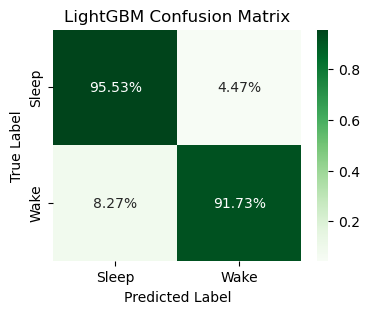

/Users/mattmacrides/miniconda3/envs/dreamt/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/mattmacrides/miniconda3/envs/dreamt/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/mattmacrides/miniconda3/envs/dreamt/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/mattmacrides/miniconda3/envs/dreamt/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/mattmacrides/miniconda3/envs/dreamt/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWa

[[8857 1545]
 [ 866 5681]]


/Users/mattmacrides/miniconda3/envs/dreamt/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


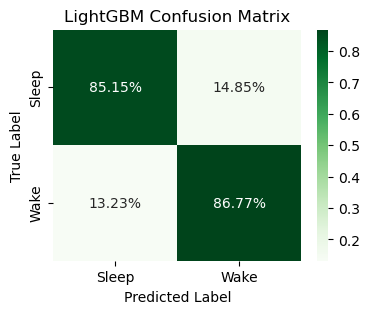

,Model,Precision,Recall,F1 Score,Specificity,AUROC,AUPRC,Accuracy,Cohen's Kappa
0,LightGBM,0.786189,0.867726,0.824947,0.851471,0.931117,0.914283,0.85775,0.696986


In [8]:
# calculate training scores
prob_ls_train, len_train, true_ls_train = compute_probabilities(
    train_sids, SW_df, final_features, "lgb", final_lgb_model, group_variable)
lgb_train_results_df = LightGBM_result(final_lgb_model, X_train, y_train, prob_ls_train, true_ls_train)

# # calculate testing scores
prob_ls_test, len_test, true_ls_test = compute_probabilities(
    test_sids, SW_df, final_features, "lgb", final_lgb_model, group_variable)
lgb_test_results_df = LightGBM_result(final_lgb_model, X_test, y_test, prob_ls_test, true_ls_test)
lgb_test_results_df


/Users/mattmacrides/miniconda3/envs/dreamt/lib/python3.10/site-packages/shap/explainers/_tree.py:583: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(
/var/folders/lv/3832vqcj2sdbl9w81_z8pp_40000gn/T/ipykernel_38555/1573495565.py:5: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_train, plot_type="bar", feature_names=final_features)


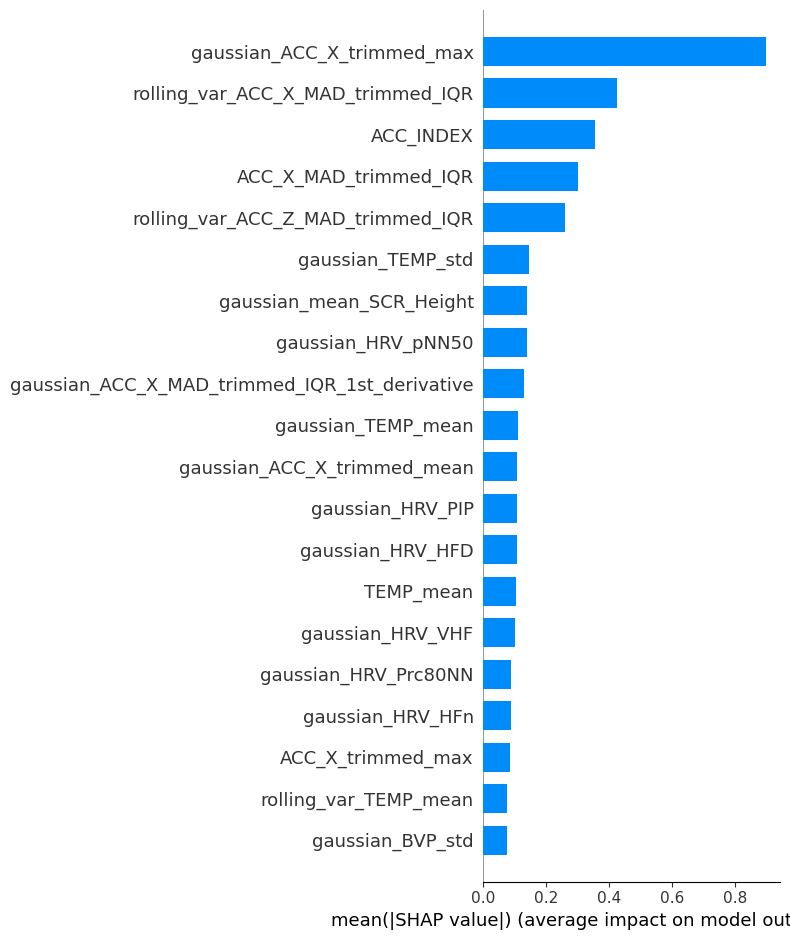

In [9]:
import shap
explainer = shap.TreeExplainer(final_lgb_model)
shap_values = explainer.shap_values(X_train)

shap.summary_plot(shap_values, X_train, plot_type="bar", feature_names=final_features)

### LightGBM and LSTM post processing

In [10]:
dataloader_train = LSTM_dataloader(
    prob_ls_train, len_train, true_ls_train, batch_size=32
)

# Run LSTM model
LSTM_model = LSTM_engine(dataloader_train, num_epoch=300, hidden_layer_size=32, learning_rate=0.001) # set your num_epoch

/Users/mattmacrides/miniconda3/envs/dreamt/lib/python3.10/site-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  warnings.warn(


Training on cpu
Epoch 5/300 - Loss: 0.6518, Accuracy: 0.6254
Epoch 10/300 - Loss: 0.6095, Accuracy: 0.6254
Epoch 15/300 - Loss: 0.5287, Accuracy: 0.8991
Epoch 20/300 - Loss: 0.3576, Accuracy: 0.9298
Epoch 25/300 - Loss: 0.2871, Accuracy: 0.9174
Epoch 30/300 - Loss: 0.2566, Accuracy: 0.9338
Epoch 35/300 - Loss: 0.2421, Accuracy: 0.9393
Epoch 40/300 - Loss: 0.2325, Accuracy: 0.9388
Epoch 45/300 - Loss: 0.2273, Accuracy: 0.9401
Epoch 50/300 - Loss: 0.2233, Accuracy: 0.9403
Epoch 55/300 - Loss: 0.2198, Accuracy: 0.9404
Epoch 60/300 - Loss: 0.2167, Accuracy: 0.9410
Epoch 65/300 - Loss: 0.2138, Accuracy: 0.9415
Epoch 70/300 - Loss: 0.2109, Accuracy: 0.9425
Epoch 75/300 - Loss: 0.2082, Accuracy: 0.9433
Epoch 80/300 - Loss: 0.2056, Accuracy: 0.9438
Epoch 85/300 - Loss: 0.2032, Accuracy: 0.9443
Epoch 90/300 - Loss: 0.2010, Accuracy: 0.9449
Epoch 95/300 - Loss: 0.1989, Accuracy: 0.9453
Epoch 100/300 - Loss: 0.1969, Accuracy: 0.9455
Epoch 105/300 - Loss: 0.1951, Accuracy: 0.9458
Epoch 110/300 - L

[[9047 1355]
 [ 775 5772]]


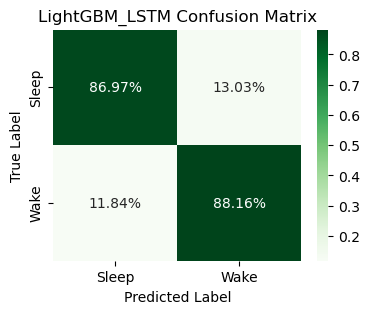

,Model,Precision,Recall,F1 Score,Specificity,AUROC,AUPRC,Accuracy,Cohen's Kappa
0,LightGBM_LSTM,0.809878,0.881625,0.84423,0.869737,0.94154,0.92422,0.874329,0.733218


In [11]:
# LSTM Cross Entropy Loss
dataloader_test = LSTM_dataloader(
    prob_ls_test, len_test, true_ls_test, batch_size=1
)
lgb_lstm_test_results_df = LSTM_eval(LSTM_model, dataloader_test, true_ls_test, 'LightGBM_LSTM')
lgb_lstm_test_results_df

### EXTENSION 1: LightGBM and LSTM post processing; Label Smoothing = 0.1

In [ ]:
dataloader_train = LSTM_dataloader(
    prob_ls_train, len_train, true_ls_train, batch_size=32
)

# Run LSTM model
LSTM_model_label_smoothing = LSTM_engine_label_smoothing(dataloader_train, num_epoch=300, hidden_layer_size=32, learning_rate=0.001) # set your num_epoch

/Users/mattmacrides/miniconda3/envs/dreamt/lib/python3.10/site-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  warnings.warn(


Training on cpu
Epoch 5/300 - Loss: 0.6443, Accuracy: 0.6254
Epoch 10/300 - Loss: 0.6052, Accuracy: 0.6256
Epoch 15/300 - Loss: 0.5237, Accuracy: 0.8956
Epoch 20/300 - Loss: 0.3835, Accuracy: 0.9225
Epoch 25/300 - Loss: 0.3794, Accuracy: 0.9204
Epoch 30/300 - Loss: 0.3617, Accuracy: 0.9255
Epoch 35/300 - Loss: 0.3588, Accuracy: 0.9268
Epoch 40/300 - Loss: 0.3564, Accuracy: 0.9271
Epoch 45/300 - Loss: 0.3547, Accuracy: 0.9271
Epoch 50/300 - Loss: 0.3536, Accuracy: 0.9273
Epoch 55/300 - Loss: 0.3525, Accuracy: 0.9275
Epoch 60/300 - Loss: 0.3515, Accuracy: 0.9273
Epoch 65/300 - Loss: 0.3505, Accuracy: 0.9275
Epoch 70/300 - Loss: 0.3496, Accuracy: 0.9275
Epoch 75/300 - Loss: 0.3487, Accuracy: 0.9276
Epoch 80/300 - Loss: 0.3478, Accuracy: 0.9276
Epoch 85/300 - Loss: 0.3470, Accuracy: 0.9278
Epoch 90/300 - Loss: 0.3461, Accuracy: 0.9277
Epoch 95/300 - Loss: 0.3453, Accuracy: 0.9278
Epoch 100/300 - Loss: 0.3445, Accuracy: 0.9278
Epoch 105/300 - Loss: 0.3438, Accuracy: 0.9278
Epoch 110/300 - L

[[9263 1139]
 [ 775 5772]]


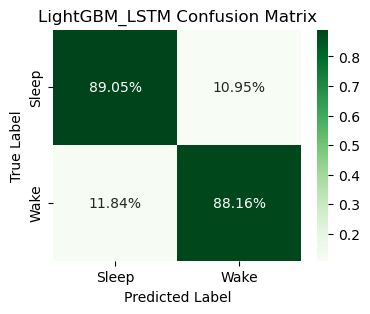

,Model,Precision,Recall,F1 Score,Specificity,AUROC,AUPRC,Accuracy,Cohen's Kappa
0,LightGBM_LSTM,0.83519,0.881625,0.85778,0.890502,0.940656,0.905615,0.887073,0.761595


In [ ]:
# LSTM Cross Entropy Loss
dataloader_test = LSTM_dataloader(
    prob_ls_test, len_test, true_ls_test, batch_size=1
)
lgb_lstm_test_results_df = LSTM_eval(LSTM_model_label_smoothing, dataloader_test, true_ls_test, 'LightGBM_LSTM')
lgb_lstm_test_results_df

### EXTENSION 2: LightGBM and LSTM post processing; Focal Loss

In [ ]:
dataloader_train = LSTM_dataloader(
    prob_ls_train, len_train, true_ls_train, batch_size=32
)

# Run LSTM model
LSTM_model_focal = LSTM_engine_focal(dataloader_train, num_epoch=300, hidden_layer_size=32, learning_rate=0.001) # set your num_epoch

/Users/mattmacrides/miniconda3/envs/dreamt/lib/python3.10/site-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  warnings.warn(


Training on cpu
Epoch 5/300 - Loss: 0.0372, Accuracy: 0.6904
Epoch 10/300 - Loss: 0.0312, Accuracy: 0.9147
Epoch 15/300 - Loss: 0.0224, Accuracy: 0.9343
Epoch 20/300 - Loss: 0.0161, Accuracy: 0.9316
Epoch 25/300 - Loss: 0.0157, Accuracy: 0.9337
Epoch 30/300 - Loss: 0.0154, Accuracy: 0.9354
Epoch 35/300 - Loss: 0.0151, Accuracy: 0.9351
Epoch 40/300 - Loss: 0.0149, Accuracy: 0.9349
Epoch 45/300 - Loss: 0.0148, Accuracy: 0.9352
Epoch 50/300 - Loss: 0.0146, Accuracy: 0.9353
Epoch 55/300 - Loss: 0.0145, Accuracy: 0.9355
Epoch 60/300 - Loss: 0.0143, Accuracy: 0.9357
Epoch 65/300 - Loss: 0.0142, Accuracy: 0.9358
Epoch 70/300 - Loss: 0.0141, Accuracy: 0.9361
Epoch 75/300 - Loss: 0.0140, Accuracy: 0.9362
Epoch 80/300 - Loss: 0.0139, Accuracy: 0.9364
Epoch 85/300 - Loss: 0.0137, Accuracy: 0.9364
Epoch 90/300 - Loss: 0.0136, Accuracy: 0.9365
Epoch 95/300 - Loss: 0.0135, Accuracy: 0.9366
Epoch 100/300 - Loss: 0.0134, Accuracy: 0.9368
Epoch 105/300 - Loss: 0.0133, Accuracy: 0.9369
Epoch 110/300 - L

[[9130 1272]
 [ 789 5758]]


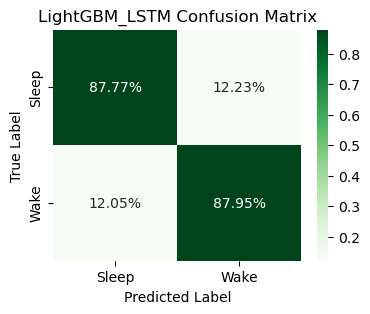

,Model,Precision,Recall,F1 Score,Specificity,AUROC,AUPRC,Accuracy,Cohen's Kappa
0,LightGBM_LSTM,0.819061,0.879487,0.848199,0.877716,0.942316,0.919045,0.8784,0.742535


In [ ]:
# LSTM Focal Loss 
dataloader_test = LSTM_dataloader(
    prob_ls_test, len_test, true_ls_test, batch_size=1
)
lgb_lstm_test_results_df = LSTM_eval(LSTM_model_focal, dataloader_test, true_ls_test, 'LightGBM_LSTM')
lgb_lstm_test_results_df

### GPBoosting

In [7]:
final_gpb_model = GPBoost_engine(X_train_resampled, group_train_resampled, y_train_resampled, X_val, y_val, group_val)

100%|██████████| 10/10 [03:37<00:00, 21.78s/trial, best loss: -0.7137571476622939]
Best hyperparameters: {'feature_fraction': 0.6790132974744107, 'lambda_l1': 50.0, 'lambda_l2': 5.481952390384453, 'learning_rate': 0.0066624082410716625, 'max_depth': 6.0, 'neg_bagging_fraction': 0.6359564653702516, 'num_boost_round': 500.0, 'num_leaves': 160.0, 'pos_bagging_fraction': 0.8657274267168107}


/Users/mattmacrides/miniconda3/envs/dreamt/lib/python3.10/site-packages/gpboost/engine.py:182: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[GPBoost] [Info] Total Bins 91238
[GPBoost] [Info] Number of data points in the train set: 66126, number of used features: 358
[GPBoost] [Info] [GPBoost with bernoulli_probit likelihood]: initscore=3.808327
[GPBoost] [Info] Start training from score 3.808327
[1]	valid_0's test_neg_log_likelihood: 0.667511
[2]	valid_0's test_neg_log_likelihood: 0.66628
[3]	valid_0's test_neg_log_likelihood: 0.665171
[4]	valid_0's test_neg_log_likelihood: 0.663966
[5]	valid_0's test_neg_log_likelihood: 0.662901
[6]	valid_0's test_neg_log_likelihood: 0.661741
[7]	valid_0's test_neg_log_likelihood: 0.660584
[8]	valid_0's test_neg_log_likelihood: 0.659393
[9]	valid_0's test_neg_log_likelihood: 0.658264
[10]	valid_0's test_neg_log_likelihood: 0.657244
[11]	valid_0's test_neg_log_likelihood: 0.656033
[12]	valid_0's test_neg_log_likelihood: 0.654883
[13]	valid_0's test_neg_log_likelihood: 0.653793
[14]	valid_0's test_neg_log_likelihood: 0.652652
[15]	valid_0's test_neg_log_likelihood: 0.65147
[16]	valid_0's te

[[30415  2648]
 [ 4815 19805]]


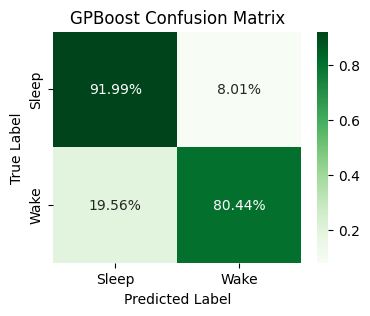

[[9143 1259]
 [1100 5447]]


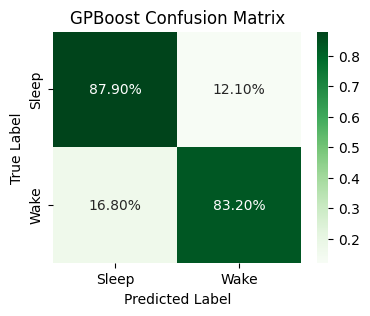

,Model,Precision,Recall,F1 Score,Specificity,AUROC,AUPRC,Accuracy,Cohen's Kappa
0,GPBoost,0.812258,0.831984,0.822003,0.878966,0.925693,0.903118,0.860818,0.700813


In [8]:
# calculate training scores
prob_ls_train, len_train, true_ls_train = compute_probabilities(
    train_sids, SW_df, final_features, 'gpb', final_gpb_model, group_variable)
gpb_train_results_df = GPBoost_result(final_gpb_model, X_train, y_train, group_train, prob_ls_train, true_ls_train)

# calculate testing scores
prob_ls_test, len_test, true_ls_test = compute_probabilities(
    test_sids, SW_df, final_features, 'gpb', final_gpb_model, group_variable)
gpb_test_results_df = GPBoost_result(final_gpb_model, X_test, y_test, group_test, prob_ls_test, true_ls_test)
gpb_test_results_df

### GPBoost + LSTM post processing

In [9]:
dataloader_train = LSTM_dataloader(
    prob_ls_train, len_train, true_ls_train, batch_size=32
)

# Run LSTM model
LSTM_model = LSTM_engine(dataloader_train, num_epoch=300, hidden_layer_size=32, learning_rate = 0.001) # set your num_epoch

Training on cpu


/Users/mattmacrides/miniconda3/envs/dreamt/lib/python3.10/site-packages/torch/nn/modules/rnn.py:82: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch 5/300 - Loss: 0.6457, Accuracy: 0.6254
Epoch 10/300 - Loss: 0.6094, Accuracy: 0.6295
Epoch 15/300 - Loss: 0.5311, Accuracy: 0.8522
Epoch 20/300 - Loss: 0.3584, Accuracy: 0.8979
Epoch 25/300 - Loss: 0.3491, Accuracy: 0.8892
Epoch 30/300 - Loss: 0.3252, Accuracy: 0.8975
Epoch 35/300 - Loss: 0.3117, Accuracy: 0.9004
Epoch 40/300 - Loss: 0.3059, Accuracy: 0.8996
Epoch 45/300 - Loss: 0.3016, Accuracy: 0.9016
Epoch 50/300 - Loss: 0.2982, Accuracy: 0.9025
Epoch 55/300 - Loss: 0.2955, Accuracy: 0.9032
Epoch 60/300 - Loss: 0.2934, Accuracy: 0.9034
Epoch 65/300 - Loss: 0.2915, Accuracy: 0.9030
Epoch 70/300 - Loss: 0.2897, Accuracy: 0.9031
Epoch 75/300 - Loss: 0.2881, Accuracy: 0.9034
Epoch 80/300 - Loss: 0.2865, Accuracy: 0.9034
Epoch 85/300 - Loss: 0.2851, Accuracy: 0.9039
Epoch 90/300 - Loss: 0.2837, Accuracy: 0.9042
Epoch 95/300 - Loss: 0.2824, Accuracy: 0.9042
Epoch 100/300 - Loss: 0.2811, Accuracy: 0.9044
Epoch 105/300 - Loss: 0.2800, Accuracy: 0.9046
Epoch 110/300 - Loss: 0.2788, Acc

[[9382 1020]
 [ 825 5722]]


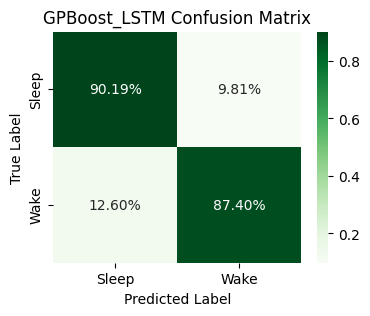

,Model,Precision,Recall,F1 Score,Specificity,AUROC,AUPRC,Accuracy,Cohen's Kappa
0,GPBoost_LSTM,0.84871,0.873988,0.861163,0.901942,0.948629,0.930459,0.891144,0.768766


In [10]:
dataloader_test = LSTM_dataloader(
    prob_ls_test, len_test, true_ls_test, batch_size=1
)

gpb_lstm_test_results_df = LSTM_eval(LSTM_model, dataloader_test, true_ls_test, 'GPBoost_LSTM')
gpb_lstm_test_results_df

In [ ]:
overall_result = pd.concat([lgb_test_results_df, lgb_lstm_test_results_df, 
                            gpb_test_results_df, gpb_lstm_test_results_df])
print(group_variable)
overall_result

['AHI_Severity']


,Model,Precision,Recall,F1 Score,Specificity,AUROC,AUPRC,Accuracy,Cohen's Kappa
0,LightGBM,0.772759,0.854437,0.811548,0.841857,0.925547,0.903694,0.846717,0.675096
0,LightGBM_LSTM,0.806598,0.866351,0.835408,0.869256,0.936992,0.914593,0.868134,0.720640
0,GPBoost,0.807147,0.834886,0.820782,0.874447,0.928169,0.907894,0.859166,0.698573
0,GPBoost_LSTM,0.840999,0.874141,0.857250,0.895982,0.942558,0.915506,0.887545,0.761084
